In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
import matplotlib.ticker as mtick
from urllib.parse import urlparse

In [2]:
df_original = pd.read_csv('Entrenamieto_ECI_2020.csv')
df = df_original

In [3]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [4]:
df.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [5]:
df["Region"].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [6]:
df["Territory"].value_counts()

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Croatia               1
Slovenia              1
Egypt                 1
Solomon Islands       1
Monaco                1
Name: Territory, Length: 76, dtype: int64

In [7]:
df_1 = df
df_1["unos"] = 1
pivot = df_1.pivot_table(index = "Region", columns = "Territory", values = "unos", aggfunc = lambda x : x.count())
pivot

Territory,Albania,Armenia,Australia,Austria,Belarus,Belgium,Bosnia & Herzegovina,Bulgaria,Burma,Cambodia,...,Switzerland,Taiwan,Thailand,Tunisia,Turkey,UAE (Dubai),UAE (Others),Ukraine,United Kingdom,Vietnam
Region,,,,,,,,,,,,,,,,,,,,,
APAC,NaN,NaN,1208.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,...,NaN,33.0,173.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0
Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMEA,2.0,2.0,NaN,145.0,4.0,285.0,4.0,5.0,NaN,NaN,...,21.0,NaN,NaN,5.0,29.0,12.0,NaN,5.0,313.0,NaN
Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middle East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.0,2.0,NaN,NaN,NaN


In [8]:
pivot = pivot.loc[:, pivot.count() != 1]
pivot

Territory,Jordan,KSA,Kuwait,None,SE America,SW America,UAE (Dubai)
Region,,,,,,,
APAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Americas,NaN,NaN,NaN,571.0,483.0,204.0,NaN
EMEA,1.0,2.0,1.0,187.0,10.0,2.0,12.0
Japan,NaN,NaN,NaN,4211.0,NaN,NaN,NaN
Middle East,101.0,11.0,3.0,30.0,NaN,NaN,19.0


In [9]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,unos
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,1
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,1


# Relacion entre los stages con las regiones

In [29]:
#falta titulo, etc del grafico
df = df_original
grouped_by_region = df.groupby(['Region','Stage']).agg({'ID':['count']})
grouped_by_region.columns = ['cantidad']
grouped_by_region = grouped_by_region.reset_index()
pivoted = grouped_by_region.pivot(index = 'Region', columns = 'Stage', values = 'cantidad').fillna(0)
pivoted = pivoted.reset_index()
pivoted

Stage,Region,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,APAC,1355.0,1896.0,0.0,8.0,3.0
1,Americas,2140.0,1793.0,8.0,4.0,0.0
2,EMEA,2189.0,2471.0,1.0,3.0,0.0
3,Japan,1546.0,3323.0,1.0,14.0,8.0
4,Middle East,120.0,50.0,8.0,6.0,0.0


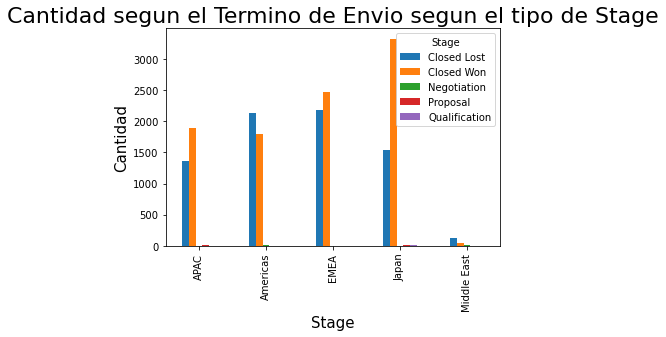

In [33]:
ax=pivoted.plot(kind='bar', y=['Closed Lost','Closed Won','Negotiation','Proposal','Qualification'], x='Region')
ax.set_title("Cantidad segun el Termino de Envio segun el tipo de Stage", fontsize=22)
ax.set_xlabel("Stage",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15) 
plt.show()

# Relacion entre marcas y stages

In [12]:
df = df_original
df = df[df['Brand'] != 'None']
df = df[df['Brand'] != 'Other']
grouped = df.groupby(['Brand','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,Brand,Stage,cantidad
0,Brand_0,Closed Lost,4
1,Brand_1,Closed Lost,1
2,Brand_10,Closed Lost,22
3,Brand_11,Closed Lost,34
4,Brand_12,Closed Lost,3
5,Brand_13,Closed Lost,17
6,Brand_16,Closed Lost,2
7,Brand_17,Closed Lost,5
8,Brand_19,Closed Lost,1
9,Brand_2,Closed Lost,4


In [13]:
#conclusion los registros que contienen marcas son TODOS Closed Lost
pivoted = grouped.pivot(index = 'Brand', columns = 'Stage', values = 'cantidad')
pivoted = pivoted.reset_index()
pivoted.set_index('Brand')

Stage,Closed Lost
Brand,
Brand_0,4
Brand_1,1
Brand_10,22
Brand_11,34
Brand_12,3
Brand_13,17
Brand_16,2
Brand_17,5
Brand_19,1


# Relacion tamaño del producto con stages

In [37]:
df = df_original
grouped = df.groupby(['Size','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,Size,Stage,cantidad
0,None,Closed Lost,6370
1,None,Closed Won,9533
2,None,Negotiation,18
3,None,Proposal,35
4,None,Qualification,11
5,Other,Closed Lost,394
6,Size_0,Closed Lost,7
7,Size_1,Closed Lost,25
8,Size_2,Closed Lost,2
9,Size_3,Closed Lost,356


# Relacion tipo de moneda con stages

In [43]:
df = df_original
grouped = df.groupby(['ASP_Currency','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,ASP_Currency,Stage,cantidad
0,AUD,Closed Lost,149
1,AUD,Closed Won,407
2,EUR,Closed Lost,2079
3,EUR,Closed Won,2422
4,EUR,Negotiation,1
5,EUR,Proposal,1
6,GBP,Closed Lost,5
7,JPY,Closed Lost,1388
8,JPY,Closed Won,3112
9,JPY,Negotiation,1


# relacion Delivery_Quarter con stages

In [44]:
df = df_original
grouped = df.groupby(['Delivery_Quarter','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,Delivery_Quarter,Stage,cantidad
0,Q1,Closed Lost,2101
1,Q1,Closed Won,2194
2,Q1,Negotiation,8
3,Q1,Proposal,13
4,Q1,Qualification,1
5,Q2,Closed Lost,1905
6,Q2,Closed Won,2518
7,Q2,Negotiation,9
8,Q2,Proposal,8
9,Q2,Qualification,3


# relacion Delivery_Year con stages

In [45]:
df = df_original
grouped = df.groupby(['Delivery_Year','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,Delivery_Year,Stage,cantidad
0,2016,Closed Lost,2234
1,2016,Closed Won,2137
2,2017,Closed Lost,2222
3,2017,Closed Won,4095
4,2017,Proposal,1
5,2018,Closed Lost,2634
6,2018,Closed Won,3196
7,2019,Closed Lost,260
8,2019,Closed Won,105
9,2019,Negotiation,18


# promedio price de stages

In [79]:
#de aca se deduce que si tiene precio es Closed Lost
df = df_original
df = df[df['Price'] != 'None']
df = df[df['Price'] != 'Other']
df['Price'] = df['Price'].astype(float)
grouped = df.groupby('Stage').agg({'Price':['count','mean']})
grouped.columns = ['cantidad','promedio']
grouped = grouped.reset_index()
grouped

,Stage,cantidad,promedio
0,Closed Lost,356,0.320323
